In [2]:
from numpy import array

ket0 = array([1, 0])
ket1 = array([0, 1])

#to display their average

# display(ket0/2 + ket1/2)

ket0/2 + ket1/2

array([0.5, 0.5])

In [4]:
#writing in the matrix form

M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])

M1/2 + M2/2

array([[1. , 1. ],
       [0.5, 0. ]])

In [5]:
from numpy import matmul

#Matrix Multiplication
 
display(matmul(M1,ket0))
display(matmul(M2,ket1))
display(matmul(M1,M2))
display(matmul(M2,M1))

array([1, 0])

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

In [6]:
#Defining and displaying state vectors and checking validity

from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1/sqrt(2) , 1/sqrt(2)])
v = Statevector([(1+2.0j)/3 , -2/3])
w = Statevector([1/3 , 2/3])

#to display the Statevectors in text or latex form
display(u.draw("latex"))
display(v.draw("text"))
display(w.draw("latex"))

#to check whether the Statevector is valid

display(u.is_valid())
display(v.is_valid())
display(w.is_valid()) #its not valid since the total probality (square of amplitudes) is not equal to 1



<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

<IPython.core.display.Latex object>

True

True

False

In [7]:
#We can modify previous codes 

v = Statevector([(1+2.0j)/3, -2/3])
v.draw("latex")


<IPython.core.display.Latex object>

In [8]:
#Measurement outcomes are probabilistic, so the same method can return different results
#it will give result randomly each time we run
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

{'0': 554, '1': 446}

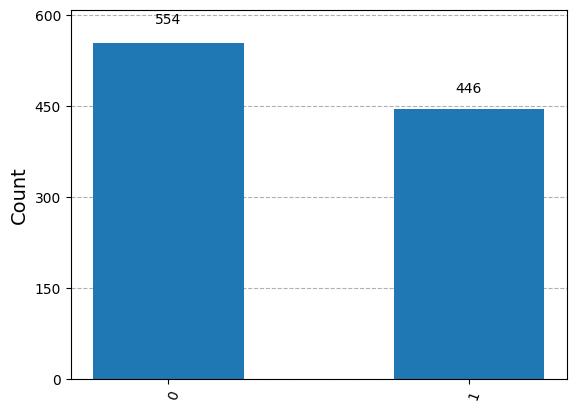

In [9]:
#To Check the probablity and count total measures

from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)  # the outcome 0 approximately 5 out of every 9 times(or about 556 out of the 1000 trials) 
display(statistics)                 # the outcome 1 approximately 4 out of every 9 times (or about 444 out of the 1000 trials)
plot_histogram(statistics)          # we will get random results each time we run

In [11]:
#Performing operations with Operator and Statevector

from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1/sqrt(2), 1/sqrt(2)], [1/sqrt(2), -1/sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j)/sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

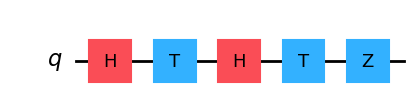

In [12]:
# Looking ahead toward quantum circuits

from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

#circuit.draw() # to show simply

#to get a good view
circuit.draw(output="mpl")


In [13]:
# statevector throug the quantum circuit

ket0 = Statevector([1, 0])

v = ket0.evolve(circuit)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

{'0': 865, '1': 135}

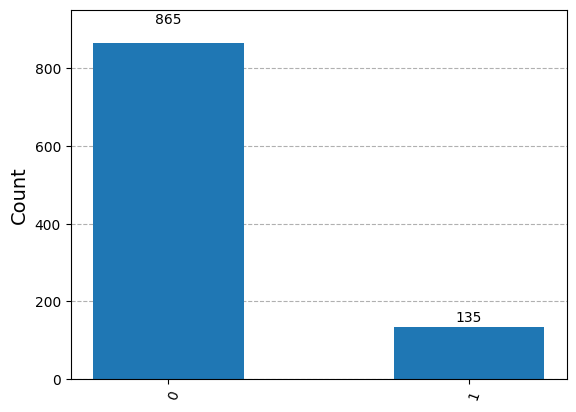

In [14]:
# Lets see the probality again after passing through circuit

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)